In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

patient_data = pd.read_csv('D:\Dataset\heart.csv')
patient_data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [38]:
print('Total number of patients = ' + str(len(patient_data.index)))

Total number of patients = 303


# Analizing Data

<Axes: xlabel='output', ylabel='count'>

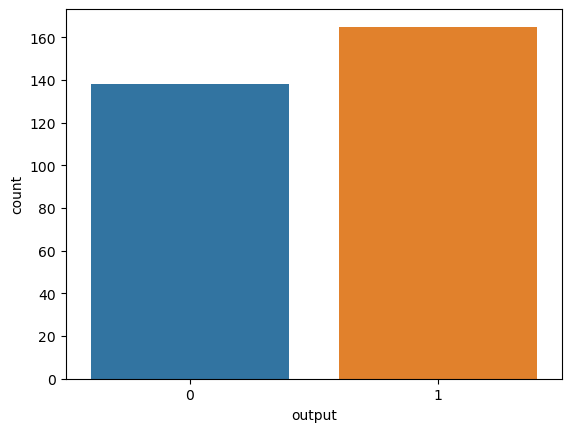

In [39]:
sns.countplot(x="output",data = patient_data)

<Axes: xlabel='output', ylabel='count'>

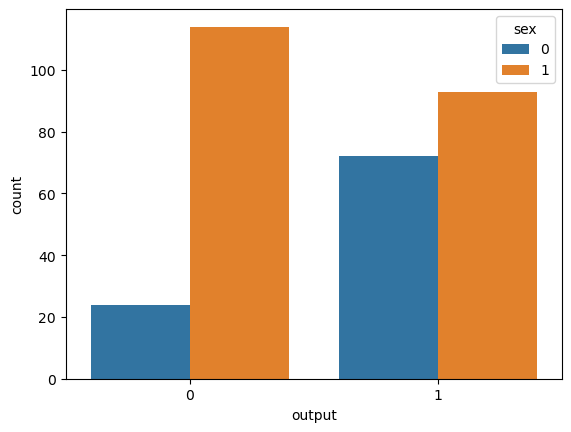

In [40]:
sns.countplot(x="output",hue = "sex",data = patient_data)

<Axes: ylabel='Frequency'>

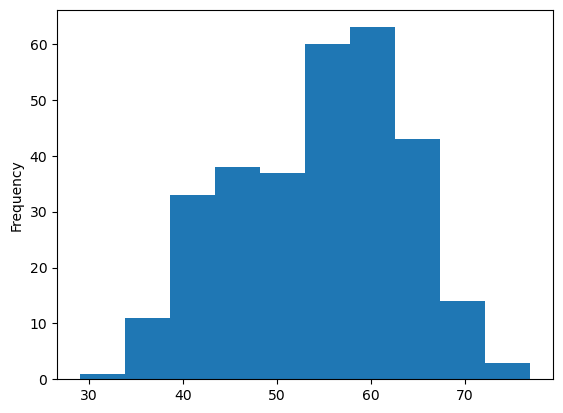

In [41]:
patient_data['age'].plot.hist()

<Axes: xlabel='output', ylabel='count'>

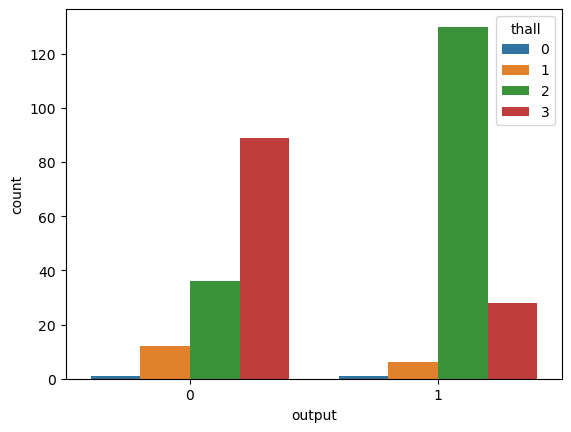

In [42]:
sns.countplot(x="output",hue = 'thall',data = patient_data) 

In [43]:
patient_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Axes: xlabel='output', ylabel='age'>

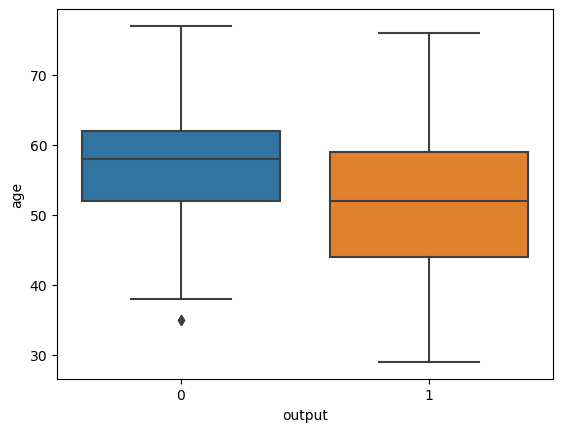

In [44]:
sns.boxplot(x = "output", y="age", data = patient_data)

# Train Data

In [45]:
X = patient_data.drop('output', axis = 1)
y = patient_data['output']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Now you can proceed to instantiate and train your logistic regression model
logmodel = LogisticRegression()



In [50]:
logmodel.fit(X_train_scaled,y_train)

LogisticRegression()

In [51]:
prediction = logmodel.predict(X_test_scaled)

In [52]:
from sklearn.metrics import classification_report

In [53]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.77      0.73      0.75        41\n           1       0.79      0.82      0.80        50\n\n    accuracy                           0.78        91\n   macro avg       0.78      0.78      0.78        91\nweighted avg       0.78      0.78      0.78        91\n'

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test,prediction)

array([[30, 11],
       [ 9, 41]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,prediction)

0.7802197802197802

# Taking Data From User

In [59]:
def get_user_input():
    age = float(input("Enter age: "))
    sex = int(input("Enter sex (0 for female, 1 for male): "))
    cp = float(input("Enter chest pain type (0-3): "))
    trtbps = float(input("Enter resting blood pressure (mm Hg): "))
    chol = float(input("Enter serum cholesterol (mg/dL): "))
    fbs = int(input("Enter fasting blood sugar (> 120 mg/dL) (0 for false, 1 for true): "))
    restecg = float(input("Enter resting electrocardiographic results (0-2): "))
    thalachh = float(input("Enter maximum heart rate achieved: "))
    exng = int(input("Enter exercise induced angina (0 for no, 1 for yes): "))
    oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
    slp = float(input("Enter the slope of the peak exercise ST segment (0-2): "))
    caa = float(input("Enter number of major vessels colored by fluoroscopy (0-3): "))
    thall = float(input("Enter thalassemia (0-3): "))
    
    return [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall]

In [63]:
user_data = get_user_input()

Enter age: 58
Enter sex (0 for female, 1 for male): 1
Enter chest pain type (0-3): 2
Enter resting blood pressure (mm Hg): 140
Enter serum cholesterol (mg/dL): 211
Enter fasting blood sugar (> 120 mg/dL) (0 for false, 1 for true): 1
Enter resting electrocardiographic results (0-2): 0
Enter maximum heart rate achieved: 165
Enter exercise induced angina (0 for no, 1 for yes): 0
Enter ST depression induced by exercise relative to rest: 0
Enter the slope of the peak exercise ST segment (0-2): 2
Enter number of major vessels colored by fluoroscopy (0-3): 0
Enter thalassemia (0-3): 2


In [64]:
user_data = np.array(user_data).reshape(1, -1)
prediction = logmodel.predict(user_data)

if prediction == 1:
    print("Based on the provided factors, the model predicts that you are at risk of a future heart attack.")
else:
    print("Based on the provided factors, the model predicts that you are not at risk of a future heart attack.")

Based on the provided factors, the model predicts that you are at risk of a future heart attack.
